## Mona Mohades Mojtahedi 810198557
## CA4

In [1]:
import pandas as pd
import numpy as np
import sklearn
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

### Load data to DataFrame

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Data info

In [3]:
data.describe()

,release_year
count,11059.000000
mean,2014.209603
std,8.959517
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 604.9+ KB


In [5]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_values = pd.DataFrame({'attributes': data.columns,'percent_missing': percent_missing})
missing_values

,attributes,percent_missing
type,type,0.000000
title,title,0.000000
cast,cast,12.342888
country,country,24.369292
release_year,release_year,0.000000
listed_in,listed_in,0.000000
description,description,0.000000


### Preprocesing data

In [6]:
data['country'].nunique()

760

In [7]:
data['country'].mode()

0    United States
dtype: object

In [8]:
data['cast'].describe()

count                   9694
unique                  9307
top       David Attenborough
freq                      20
Name: cast, dtype: object

### Normalization & Standardization

In [37]:
#x = new_data['release_year'].to_numpy() #returns a numpy array
#X = x.reshape(1,-1)
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(reshaped_x)
# df = pd.DataFrame(x_scaled)
# df

# min max
#X = (X - X.min()) / (X.max() - X.min())

# standard normal zero mean unit standard deviation
# X = (X - X.mean()) / X.std()

#new_data['release_year'] = X[0]

### Fill Missing Values

In [9]:
data.fillna('U', inplace=True)
data.head()

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,U,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",U,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,U,U,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Feature Extraction

In [10]:
from sklearn.feature_extraction.text import (CountVectorizer, 
                                             TfidfVectorizer,
                                             TfidfTransformer)

#### listed_in features

In [11]:
listed_in = data['listed_in'].values
vectorizer = CountVectorizer(analyzer='word', stop_words='english', max_features = 30, ngram_range=(1, 1))
vectorized = vectorizer.fit_transform(listed_in)
new_df = pd.DataFrame(vectorized.toarray(), 
            columns=vectorizer.get_feature_names())

#### Title Features

In [12]:
title = data['title'].values
vectorizer = CountVectorizer(analyzer='word', stop_words='english', max_features = 30, ngram_range=(1, 1))
vectorized = vectorizer.fit_transform(title)
new_df[vectorizer.get_feature_names()] = vectorized.toarray()

#### Cast Features

In [13]:
cast = data['cast'].values
vectorizer = CountVectorizer(analyzer='word', stop_words='english', max_features = 30, ngram_range=(1, 1))
vectorized = vectorizer.fit_transform(cast)
new_df[vectorizer.get_feature_names()] = vectorized.toarray()

#### Description Features

In [14]:
desc = data['description'].values
vectorizer = CountVectorizer(analyzer='word', stop_words='english', max_features = 50, ngram_range=(1, 1))
vectorized = vectorizer.fit_transform(desc)
new_df[vectorizer.get_feature_names()] = vectorized.toarray()

#### Country Fetures

In [15]:
country = data['country'].values
vectorizer = CountVectorizer(analyzer='word', stop_words='english', max_features = 30, ngram_range=(1, 1))
vectorized = vectorizer.fit_transform(country)
new_df[vectorizer.get_feature_names()] = vectorized.toarray()

### Lable Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
labelencoder = LabelEncoder()
y = data['type'].values
y = labelencoder.fit_transform(y)
new_df['type'] = y

In [18]:
new_df.head()

,action,adventure,animation,anime,children,comedies,comedy,crime,documentaries,documentary,...,nigeria,philippines,south,spain,states,taiwan,thailand,turkey,united,type
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
new_df['type'].value_counts()

0    6131
1    4928
Name: type, dtype: int64

#### Information Gain

In [20]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [21]:
x = new_df.iloc[:,:-1].values
y = new_df.iloc[:,-1].values

In [22]:
result = dict(zip(new_df.columns,
               mutual_info_classif(x, y, discrete_features=True)))

In [23]:
result = dict(sorted(result.items(), key=lambda item: item[1]))
v = result.values()
k = result.keys()

In [24]:
s = []
for i in k:
    s.append(sum(new_df[i]))

Text(0.5, 1.0, 'Gain')

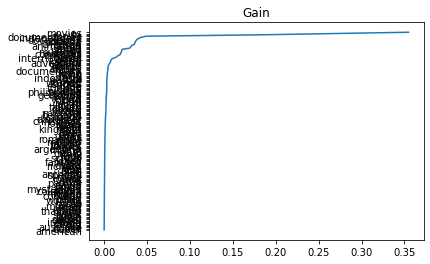

In [25]:
plt. plot(v,k)
plt.title('Gain')

Text(0.5, 1.0, 'count')

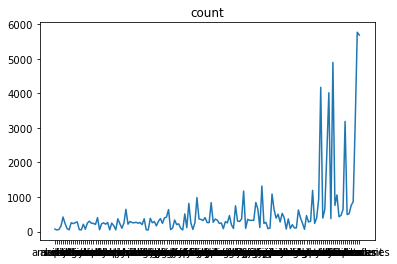

In [26]:
plt.plot(k,s)
plt.title('count')

### Split dataset

In [26]:
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(x, y, test_size=0.25)

### Decision Tree

In [28]:
#min_samples_split: int or float, default=2
#The minimum number of samples required to split an internal node:
#If int, then consider min_samples_split as the minimum number.
#If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples)
#are the minimum number of samples for each split.

#max_depth: int, default=None
#The maximum depth of the tree. If None, then nodes are expanded until all
#leaves are pure or until all leaves contain less than min_samples_split samples.

### Grid Search

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [28]:
grid = GridSearchCV(
        estimator=DecisionTreeClassifier(),
        param_grid={
            'min_samples_split': [5, 10, 15, 20],
            'max_depth': [5, 10, 15, 20, 25, 30, 40, 50, 60],
        },
        cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [29]:
grid_result = grid.fit(xtrain, ytrain)
best_params = grid_result.best_params_

best_dt = DecisionTreeClassifier( min_samples_split=best_params["min_samples_split"],
                                 max_depth=best_params["max_depth"])

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [30]:
best_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=50, min_samples_split=5)

In [31]:
best_dt.score(xtest, ytest)

0.9971066907775769

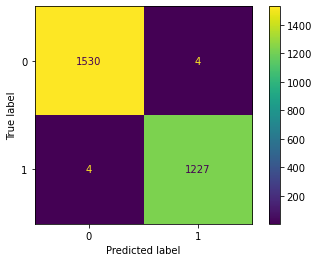

In [33]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_dt, xtest, ytest)

#### Effect of diffrent depth

In [34]:
train_auc = list()
test_auc = list()
for i in [2,5,10,15,20,30,40,60,80,100]:
    best_dt = DecisionTreeClassifier( min_samples_split = best_params["min_samples_split"],max_depth= i )
    best_dt.fit(xtrain, ytrain)
    test_auc.append(best_dt.score(xtest, ytest))
    train_auc.append(best_dt.score(xtrain, ytrain))

Text(0.5, 1.0, 'Different Depths')

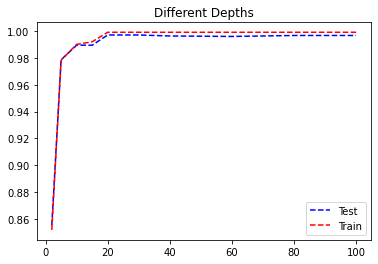

In [35]:
te, = plt.plot([2,5,10,15,20,30,40,60,80,100], test_auc, 'b--')
tr, = plt.plot([2,5,10,15,20,30,40,60,80,100], train_auc, 'r--')
plt.legend([te, tr], ['Test', 'Train'])
plt.title('Different Depths')

### Confiusion for dt-depth = 2

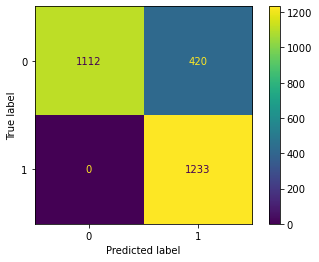

In [37]:
dt = DecisionTreeClassifier( min_samples_split = best_params["min_samples_split"],max_depth= 2 )
dt.fit(xtrain, ytrain)
plot_confusion_matrix(dt, xtest, ytest)

### Confiusion for dt-depth = 30

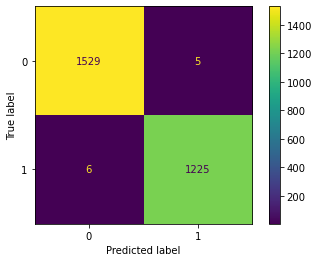

In [36]:
dt = DecisionTreeClassifier( min_samples_split = best_params["min_samples_split"],max_depth= 30 )
dt.fit(xtrain, ytrain)
plot_confusion_matrix(dt, xtest, ytest)

### Confiusion for dt-depth = 100

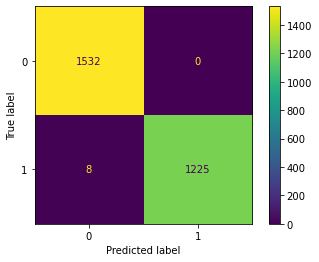

In [40]:
dt = DecisionTreeClassifier( min_samples_split = best_params["min_samples_split"],max_depth= 100 )
dt.fit(xtrain, ytrain)
plot_confusion_matrix(dt, xtest, ytest)

### Random Forest

In [423]:
from sklearn.ensemble import RandomForestClassifier

In [428]:
depth = [4, 5, 7, 10, 15, 20]
samples = [5, 8, 10, 12, 15, 20, 25, 40]

In [433]:
train_Auc = list()
test_Auc = list()
for i in depth:
    for j in samples:
        rf= RandomForestClassifier(n_estimators=100, max_depth=i, min_samples_split=j)
        rf.fit(xtrain, ytrain)
        test_Auc.append(rf.score(xtest, ytest))
        train_Auc.append(rf.score(xtrain, ytrain))

Text(0.5, 1.0, 'RF AUC')

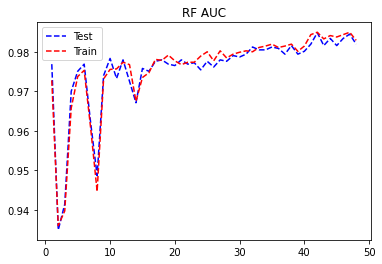

In [440]:
rfs = range(1,49)
te, = plt.plot(rfs, test_Auc, 'b--')
tr, = plt.plot(rfs, train_Auc, 'r--')
plt.legend([te, tr], ['Test', 'Train'])
plt.title('Different Hypreparameters')
plt.title('RF AUC')

In [382]:
rf= RandomForestClassifier(n_estimators=100,
                                       max_depth=25,
                                       min_samples_split=20)

In [383]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=25, min_samples_split=20)

In [384]:
rf.score(xtest, ytest)

0.9804098854731766

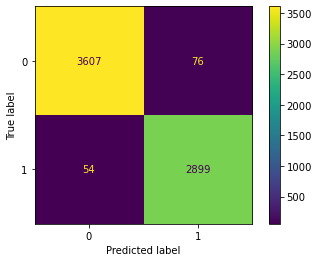

In [385]:
plot_confusion_matrix(rf, xtest, ytest)

### Effect of # features

In [345]:
listed_in = data['listed_in'].values
vectorizer = CountVectorizer(analyzer='word', stop_words='english', max_features = 50, ngram_range=(1, 1))
vectorized = vectorizer.fit_transform(listed_in)
new_df = pd.DataFrame(vectorized.toarray(), 
            columns=vectorizer.get_feature_names())

title = data['title'].values
vectorizer = CountVectorizer(analyzer='word', stop_words='english', max_features = 50, ngram_range=(1, 1))
vectorized = vectorizer.fit_transform(title)
new_df[vectorizer.get_feature_names()] = vectorized.toarray()

cast = data['cast'].values
vectorizer = CountVectorizer(analyzer='word', stop_words='english', max_features = 50, ngram_range=(1, 1))
vectorized = vectorizer.fit_transform(cast)
new_df[vectorizer.get_feature_names()] = vectorized.toarray()

desc = data['description'].values
vectorizer = CountVectorizer(analyzer='word', stop_words='english', max_features = 100, ngram_range=(1, 1))
vectorized = vectorizer.fit_transform(desc)
new_df[vectorizer.get_feature_names()] = vectorized.toarray()

country = data['country'].values
vectorizer = CountVectorizer(analyzer='word', stop_words='english', max_features = 50, ngram_range=(1, 1))
vectorized = vectorizer.fit_transform(country)
new_df[vectorizer.get_feature_names()] = vectorized.toarray()

In [346]:
labelencoder = LabelEncoder()
y = data['type'].values
y = labelencoder.fit_transform(y)
new_df['type'] = y

In [347]:
x = new_df.iloc[:,:-1].values
y = new_df.iloc[:,-1].values
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(x, y, test_size=0.25)

In [348]:
best_dt = DecisionTreeClassifier( min_samples_split=best_params["min_samples_split"],
                                 max_depth=best_params["max_depth"])

In [349]:
best_dt.fit(xtrain, ytrain)
best_dt.score(xtest, ytest)

0.9804701627486437

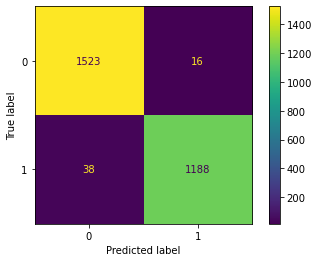

In [350]:
plot_confusion_matrix(best_dt, xtest, ytest)

In [351]:
rf= RandomForestClassifier(n_estimators=100,
                                       max_depth=20,
                                       min_samples_split=20)
rf.fit(xtrain, ytrain)
rf.score(xtest, ytest)

0.9815551537070525

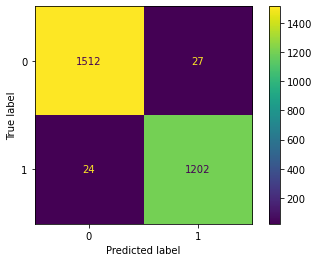

In [352]:
plot_confusion_matrix(rf, xtest, ytest)